Sentiment Analysis of IMDb Reviews by using the Data set.
The dataset is from the great Stanford university itself. We are just using it for our research purpose only.

PREPARATION OF DATA
We know that our data can be anything, here we are given text data which should be modified for us to work as a dataframe.

In [1]:
#This function is created to read the reviews and for helping me in the process of making the data frame.

import os

def fetch_reviews(path):
  data = []
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())
      
  return data

The data set is extracted in the folder which I am working.
The data set is divided into two folder which comprise of
1) Training data --> In which there are files containing both positive and negative data sets which are in the form of word documents.
2) Testing data --> Similarly, these also contains both positive and negative data sets which are in the form of word documents.

So our main motive will be to merge these 'txt' into a single data frame for us to work. Hence, for doing this we take the help of the pandas library.

In [2]:
import pandas as pd

#Here double-slash I used because python is interpreting it as a special character which is coming afterwards.
df_train_pos = pd.DataFrame({'review': fetch_reviews('C:\\Users\\hp\\OneDrive\\Desktop\\Python\\.vscode\\aclImdb\\train\\pos\\'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('C:\\Users\\hp\\OneDrive\\Desktop\\Python\\.vscode\\aclImdb\\train\\neg\\'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('C:\\Users\\hp\\OneDrive\\Desktop\\Python\\.vscode\\aclImdb\\test\\pos\\'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('C:\\Users\\hp\\OneDrive\\Desktop\\Python\\.vscode\\aclImdb\\test\\neg\\'), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)
print(df.shape)
df.head()

(50000, 2)


,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


Now we are ready with our dataframe (df) which will be used as a supervised data set which will help me create the model, which as a result can be used for the prediction of the sentiment for the new reviews.

EXPLORATORY DATA ANALYSIS
In this we try to get some insights regarding our dataset.

In [3]:
#Here I am verifying if there are any null values associated with the data set.

df.isnull().sum()

review    0
label     0
dtype: int64

Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000


C:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

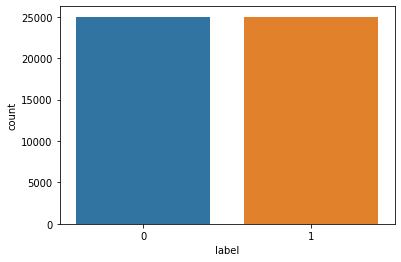

In [4]:
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])

import seaborn as sns

sns.countplot(df['label'])

So from above we can observe that our data contains the equal amount of both positive and negative reviews.

In [5]:
#Here we are counting the number of words in our each review.

word_count = df['review'].apply(lambda x: len(x.split()))
word_count.describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64

So we see a review can range from minimum of 4 words to a maximum of 2470, but their average i.e, mean lies at 231 words. Its pretty good actually.

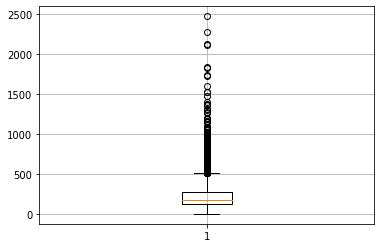

In [6]:
import matplotlib.pyplot as plt

plt.boxplot(word_count.values)
plt.grid(True)
plt.show()

We can observe that most of the reviews lie between 200-350 words.

DATA PREPROCESSING
This process helps us for the conversion of human understandable data into a machine understandable format like the numbers.

In [7]:
#A regular expression (import re) is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern.
import re

# At first you have to download these nltk packages.
import nltk
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')

# After the above we have to use nltk library for preprocessing so we import the following.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')

# Removing not from the stop_words list as it contains value in negative movies
stop_words.remove('not')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


So, we downloaded all the resources which we need for preprocessing and let us try to induce this to create a function for the preprocessing purpose.

In [9]:
# The above statement can be acheived with the help of lambda function
df['preprocessed_review'] = df['review'].apply(lambda x: data_preprocessing(x))
df.head()

,review,label,preprocessed_review
0,Bromwell High is a cartoon comedy. It ran at t...,1,bromwell high cartoon comedy ran time program ...
1,Homelessness (or Houselessness as George Carli...,1,homelessness houselessness george carlin state...
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,brilliant acting lesley ann warren best dramat...
3,This is easily the most underrated film inn th...,1,easily underrated film inn brook cannon sure f...
4,This is not the typical Mel Brooks film. It wa...,1,not typical mel brook film much le slapstick m...


Now the preprocssing is done.
So, we try to observe the words with the help of word cloud which gives us a very good picture regarding the intensity distribution of the words, with respect to their size corresponds the maximuim intensity.

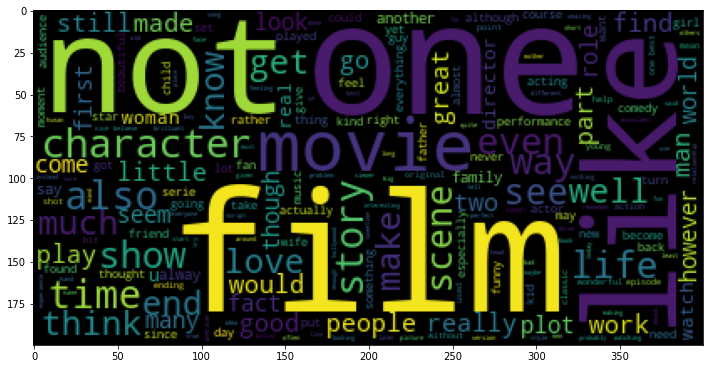

In [10]:
from wordcloud import WordCloud

words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

positive_wc =  WordCloud(stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(12, 12))
plt.imshow(positive_wc)
plt.show()

The above represents the positive sentiment wordcloud, also here we can see that the word 'film' has highest size so it has maximum intensity i.e, it occured most of the times in the reviews.

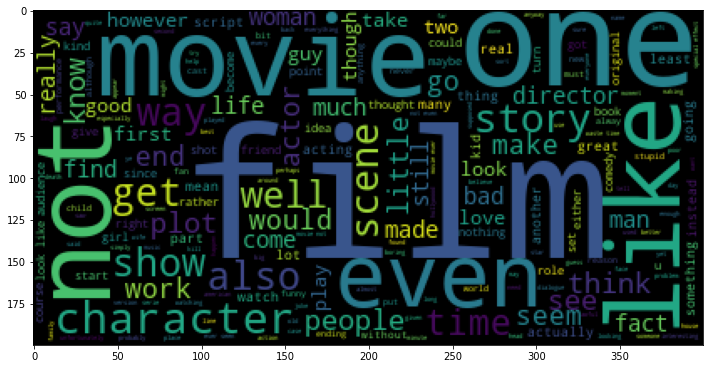

In [11]:
words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

negative_wc =  WordCloud(stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(12, 12))
plt.imshow(negative_wc)
plt.show()

The above represents the negative sentiment wordcloud. Here in the negative words also authors written about the word 'film' most of the time.

In [12]:
from sklearn.model_selection import train_test_split as tts

df_copy = df
X = df_copy.drop(['label'], axis=1)
y = df_copy['label'].values

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (40000, 2) (40000,)
Test data: (10000, 2) (10000,)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(min_df=20)

X_train_vec = vector.fit_transform(X_train['preprocessed_review'])
X_test_vec = vector.transform(X_test['preprocessed_review'])

print(X_train_vec.shape, X_test_vec.shape)

(40000, 14184) (10000, 14184)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(min_df=20)

X_train_vec = vector.fit_transform(X_train['preprocessed_review'])
X_test_vec = vector.transform(X_test['preprocessed_review'])

print(X_train_vec.shape, X_test_vec.shape)

(40000, 14184) (10000, 14184)


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print(accuracy_score(y_test, y_pred))

0.8521


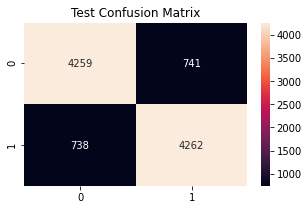

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8948


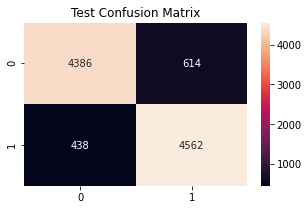

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_test_vec)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8544


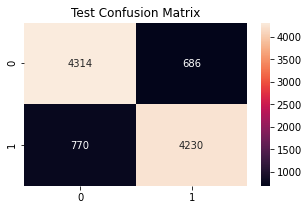

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()